### Task 2: Load the Data and Libraries
---

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize']=(12,8)

In [13]:
data=pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Task 3: Visualize the Data

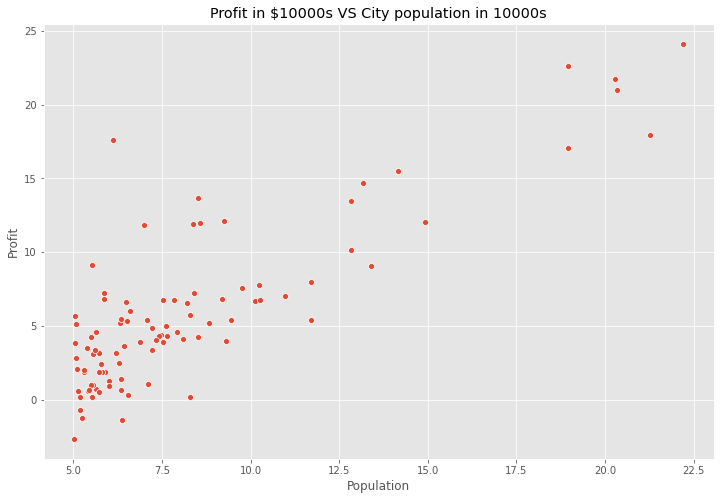

In [16]:
ax=sns.scatterplot(x="Population", y='Profit',data=data)
ax.set_title("Profit in $10000s VS City population in 10000s");

### Task 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [22]:
def cost_fct(X,Y,theta):
    m=len(Y)
    y_pred=X.dot(theta)
    error=(y_pred-Y)**2
    return 1/(2*m)*np.sum(error)

In [23]:
m=data.Population.values.size
X=np.append(np.ones((m,1)),data.Population.values.reshape(m,1),axis=1)
Y=data.Profit.values.reshape(m,1)
theta=np.zeros((2,1))

cost_fct(X,Y,theta)

32.072733877455676

### Gradient Descent

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [34]:
def gradient_descent(X,Y,theta,alpha,it):
    m=len(Y)
    costs=[]
    for i in range(it):
        y_pred= X.dot(theta)
        error=np.dot(X.T,(y_pred-Y))
        theta-=alpha*1/m*error
        costs.append(cost_fct(X,Y,theta))
        return theta,costs

In [48]:
theta,costs=gradient_descent(X,Y,theta,alpha=0.01,it=2000)
print("h(x)={}+{}x1".format(str(round(theta[0,0],2)),
                            str(round(theta[1,0],2))))

h(x)=-0.04+0.81x1


### Task 6: Visualising the Cost Function $J(\theta)$


In [49]:
from mpl_toolkits.mplot3d import Axes3D